# Análisis de Sentimiento y Engagement en Noticias
Este cuaderno tiene como objetivo preprocesar datos de redes sociales para el análisis de sentimiento, explorando las interacciones de noticias de diferentes fuentes.

## 1. Carga de Datos

Participación en las noticias globales en las redes sociales
Información de CNN, BBC, Al Jazeera, Reuters
Última actualización: hace 10 meses (versión 1)

Acerca de este conjunto de datos
Este conjunto de datos integral ofrece un análisis profundo de las métricas de participación en las redes sociales de casi 4000 publicaciones de cuatro de los principales canales de noticias del mundo: CNN, BBC, Al Jazeera y Reuters. La colección, seleccionada para brindar una visión integral de la interacción de las noticias globales en las redes sociales, se destaca por su meticuloso ensamblaje y su amplio espectro de contenido.

Descripción general del conjunto de datos:
Este conjunto de datos, que abarca varios eventos, temas y narrativas globales, es una instantánea de cómo se consumen las noticias y cómo se interactúa con ellas en las plataformas de redes sociales. Sirve como un recurso valioso para analizar tendencias, patrones de participación y la difusión de información a través de las fronteras internacionales.

Aplicaciones de la ciencia de datos:
Ideal para investigadores y entusiastas en los campos de la ciencia de datos, los estudios de medios y el análisis social, este conjunto de datos abre las puertas a numerosas exploraciones, como el análisis de la interacción, la previsión de tendencias, la optimización de la estrategia de contenido y el estudio del flujo de información en espacios digitales. También tiene potencial para proyectos de aprendizaje automático que apuntan a predecir la interacción o clasificar el contenido en función de métricas de interacción.

Descriptores de columnas:
Cada registro del conjunto de datos se detalla con las siguientes columnas:

texto: el título o el contenido principal de la publicación.
me gusta: la cantidad de me gusta que ha obtenido cada publicación.
comentarios: la cantidad de comentarios que dejaron los espectadores.
compartidos: la cantidad de veces que se compartió la publicación.
Datos extraídos éticamente:
La recopilación de este conjunto de datos se realizó teniendo en cuenta los estándares éticos más altos, lo que garantiza el cumplimiento de las leyes de privacidad de datos y las políticas de la plataforma. Al anonimizar los datos cuando sea necesario y centrarse únicamente en la información disponible públicamente, respeta tanto la privacidad individual como los derechos de propiedad intelectual.

Queremos agradecer especialmente a la plataforma de Facebook y a los canales de noticias respectivos por su apertura y la gran cantidad de datos públicos que brindan. Este conjunto de datos no solo celebra el vibrante intercambio en las redes sociales, sino que también subraya la importancia del uso y el intercambio responsable de datos para fomentar la comprensión y la innovación.

Cargaremos los datos de cuatro archivos CSV correspondientes a diferentes fuentes de noticias: `al_jazeera.csv`, `bbc.csv`, `cnn.csv` y `reuters.csv`. Estos contienen las siguientes columnas:
- `text`: Contenido de la noticia compartida.
- `likes`: Cantidad de 'me gusta'.
- `comments`: Número de comentarios.
- `shares`: Número de veces compartido.

Fuente: https://www.kaggle.com/code/helizain/an-lisis-sentimiental-del-engagement-de-noticias/notebook

In [1]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
from src.preprocessing import clean_text
# from wordcloud import WordCloud
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.probability import FreqDist
# from nltk import ngrams
# from nltk.stem import SnowballStemmer
# import string
# import numpy as np
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer, HashingVectorizer, ENGLISH_STOP_WORDS
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline


ModuleNotFoundError: No module named 'src'

In [3]:
# Lista de archivos
files = ['al_jazeera.csv', 'bbc.csv', 'cnn.csv', 'reuters.csv']

# Cargar los archivos en un diccionario de DataFrames
dfs = {file: pd.read_csv("../data/"+file) for file in files}

# Mostrar las primeras filas de cada archivo
for name, df in dfs.items():
    print(f"\n{name}:")
    display(df.head())


al_jazeera.csv:


,text,likes,comments,shares
0,“Numbers dropped by around half after the eart...,303,15,5
1,This exclusive footage obtained by Al Jazeera ...,809,174,81
2,The disappearance of 6-year-old Joshlin Smith ...,236,75,33
3,Millions are still suffering the pandemic’s li...,87,11,11
4,Multan Sultans face Peshawar Zalmi in the Paki...,522,71,5



bbc.csv:


,text,likes,comments,shares
0,Queen Camilla was given a miniature version of...,577,228,50
1,"The study found females of five ""menopausal"" w...",174,18,52
2,The Ivy League university is named after Elihu...,116,59,44
3,"When the law passed in 2019, it sparked mass p...",133,56,16
4,"Freedom Village is located inside Korea's DMZ,...",117,18,26



cnn.csv:


,text,likes,comments,shares
0,Measles cases are increasing in the United Sta...,17,34,1
1,"At the turn of the millennium, web-based techn...",192,81,28
2,SpaceX launched the world's most powerful rock...,233,122,68
3,Italy’s competition authority has fined TikTok...,131,144,17
4,"SpaceX's Starship, the most powerful rocket ev...",390,237,37



reuters.csv:


,text,likes,comments,shares
0,Taiwan dispatched coast guard boats to join a ...,3,1,1
1,Croatia's historic city of Dubrovnik aims to l...,11,5,1
2,As Senegal holds a delayed election on March 2...,5,4,2
3,Exclusive: Citigroup is investigating workplac...,4,6,0
4,Research in the expanding field of space medic...,15,6,2


## 2. Exploración y Estadísticas Descriptivas
Vamos a analizar la estructura y características de los datos, identificando valores faltantes y distribuciones de interacciones.

In [4]:
# Verificar valores nulos en cada archivo
for name, df in dfs.items():
    print(f"\nValores nulos en {name}:")
    print(df.isnull().sum())


Valores nulos en al_jazeera.csv:
text        19
likes        0
comments     0
shares       0
dtype: int64

Valores nulos en bbc.csv:
text        0
likes       0
comments    0
shares      0
dtype: int64

Valores nulos en cnn.csv:
text        0
likes       0
comments    0
shares      0
dtype: int64

Valores nulos en reuters.csv:
text        0
likes       0
comments    0
shares      0
dtype: int64


## 3. Visualización de Datos
Generaremos gráficos para entender el comportamiento de los likes, comentarios y compartidos.

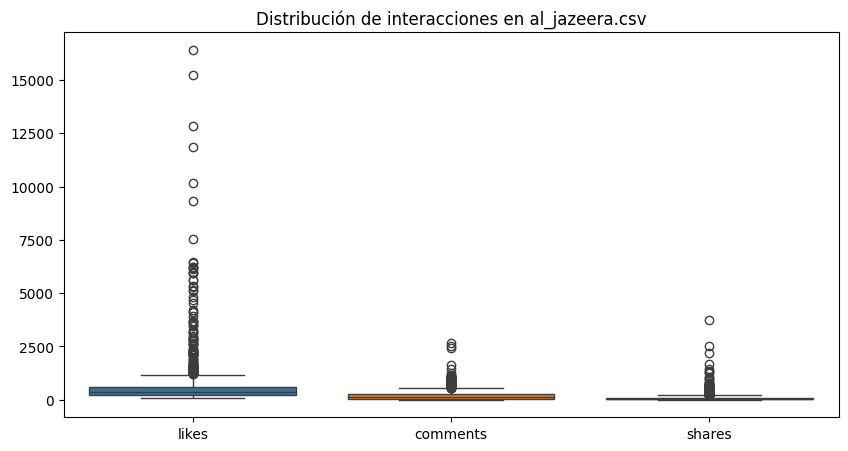

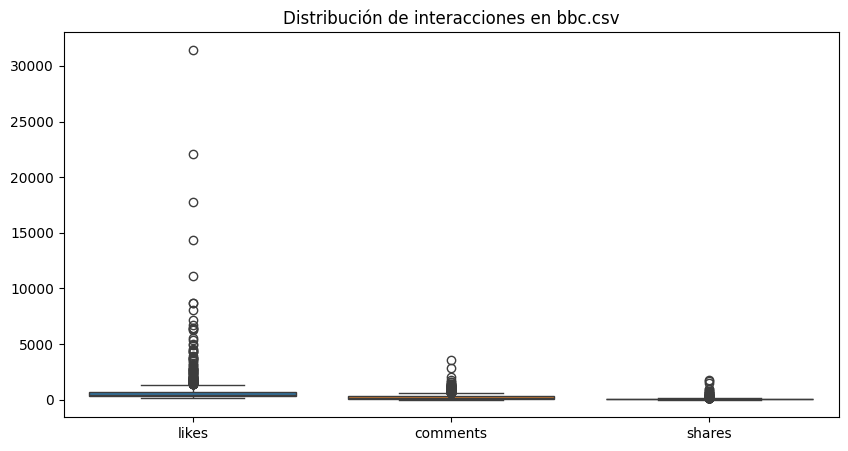

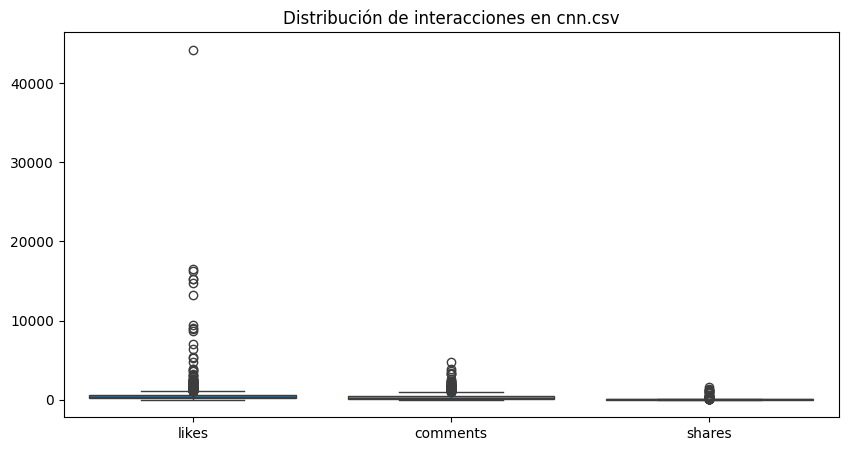

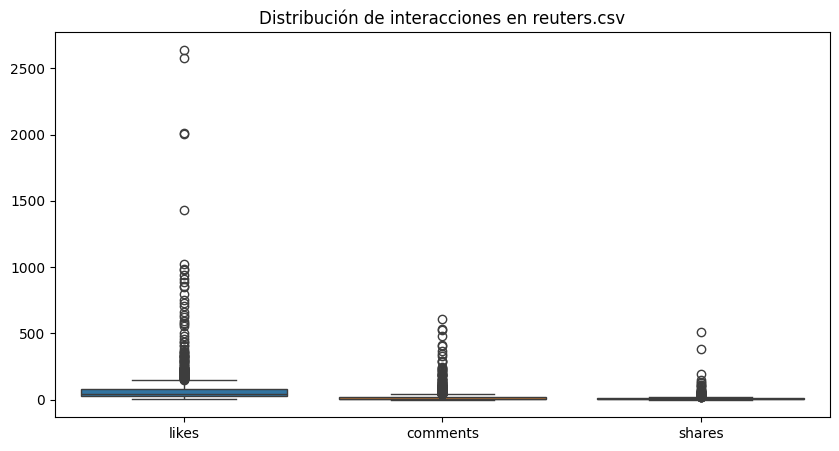

In [5]:
for name, df in dfs.items():
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df[['likes', 'comments', 'shares']])
    plt.title(f'Distribución de interacciones en {name}')
    plt.show()

## 4. Procesamiento de Texto
Limpieza de datos textuales mediante eliminación de caracteres especiales y conversión a minúsculas.

In [7]:
df['text']

0      “Numbers dropped by around half after the eart...
1      This exclusive footage obtained by Al Jazeera ...
2      The disappearance of 6-year-old Joshlin Smith ...
3      Millions are still suffering the pandemic’s li...
4      Multan Sultans face Peshawar Zalmi in the Paki...
                             ...                        
995    “It is the food of animals.” Umm Muhammad Hamm...
996    🔴 "...The facility recently coped with 78 deli...
997    Hungary replaces President Katalin Novak with ...
998    🔴 Doctors at al-Shifa Hospital in Gaza City ar...
999    A Pakistani police officer is being hailed as ...
Name: text, Length: 1000, dtype: object

In [8]:
for name, df in dfs.items():
    df['text'] = df['text'].astype(str)  # Convertir toda la columna a string
    df['clean_text'] = df['text'].apply(clean_text)
    print(f"\nTexto procesado en {name}:")
    display(df[['text', 'clean_text']].head())


Texto procesado en al_jazeera.csv:


,text,clean_text
0,“Numbers dropped by around half after the eart...,numbers dropped by around half after the earth...
1,This exclusive footage obtained by Al Jazeera ...,this exclusive footage obtained by al jazeera ...
2,The disappearance of 6-year-old Joshlin Smith ...,the disappearance of 6yearold joshlin smith ha...
3,Millions are still suffering the pandemic’s li...,millions are still suffering the pandemics lin...
4,Multan Sultans face Peshawar Zalmi in the Paki...,multan sultans face peshawar zalmi in the paki...



Texto procesado en bbc.csv:


,text,clean_text
0,Queen Camilla was given a miniature version of...,queen camilla was given a miniature version of...
1,"The study found females of five ""menopausal"" w...",the study found females of five menopausal wha...
2,The Ivy League university is named after Elihu...,the ivy league university is named after elihu...
3,"When the law passed in 2019, it sparked mass p...",when the law passed in 2019 it sparked mass pr...
4,"Freedom Village is located inside Korea's DMZ,...",freedom village is located inside koreas dmz a...



Texto procesado en cnn.csv:


,text,clean_text
0,Measles cases are increasing in the United Sta...,measles cases are increasing in the united sta...
1,"At the turn of the millennium, web-based techn...",at the turn of the millennium webbased technol...
2,SpaceX launched the world's most powerful rock...,spacex launched the worlds most powerful rocke...
3,Italy’s competition authority has fined TikTok...,italys competition authority has fined tiktok ...
4,"SpaceX's Starship, the most powerful rocket ev...",spacexs starship the most powerful rocket ever...



Texto procesado en reuters.csv:


,text,clean_text
0,Taiwan dispatched coast guard boats to join a ...,taiwan dispatched coast guard boats to join a ...
1,Croatia's historic city of Dubrovnik aims to l...,croatias historic city of dubrovnik aims to lu...
2,As Senegal holds a delayed election on March 2...,as senegal holds a delayed election on march 2...
3,Exclusive: Citigroup is investigating workplac...,exclusive citigroup is investigating workplace...
4,Research in the expanding field of space medic...,research in the expanding field of space medic...


## 5. Análisis de Sentimiento
Usaremos la biblioteca `TextBlob` para asignar una puntuación de sentimiento a cada texto.

In [9]:
# Análisis de sentimiento
for name, df in dfs.items():
    df['sentiment'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    print(f"\nAnálisis de sentimiento en {name}:")
    display(df[['clean_text', 'sentiment']].head())


Análisis de sentimiento en al_jazeera.csv:


,clean_text,sentiment
0,numbers dropped by around half after the earth...,0.111111
1,this exclusive footage obtained by al jazeera ...,0.000000
2,the disappearance of 6yearold joshlin smith ha...,0.000000
3,millions are still suffering the pandemics lin...,-0.112500
4,multan sultans face peshawar zalmi in the paki...,0.234848



Análisis de sentimiento en bbc.csv:


,clean_text,sentiment
0,queen camilla was given a miniature version of...,0.500
1,the study found females of five menopausal wha...,-0.125
2,the ivy league university is named after elihu...,0.000
3,when the law passed in 2019 it sparked mass pr...,0.500
4,freedom village is located inside koreas dmz a...,0.400



Análisis de sentimiento en cnn.csv:


,clean_text,sentiment
0,measles cases are increasing in the united sta...,0.000000
1,at the turn of the millennium webbased technol...,0.250000
2,spacex launched the worlds most powerful rocke...,0.147115
3,italys competition authority has fined tiktok ...,-0.312500
4,spacexs starship the most powerful rocket ever...,0.234091



Análisis de sentimiento en reuters.csv:


,clean_text,sentiment
0,taiwan dispatched coast guard boats to join a ...,0.100000
1,croatias historic city of dubrovnik aims to lu...,0.085707
2,as senegal holds a delayed election on march 2...,0.003704
3,exclusive citigroup is investigating workplace...,-0.100000
4,research in the expanding field of space medic...,0.120671


## 6. Conclusiones
Tras el análisis, hemos identificado patrones en el engagement de noticias de diferentes fuentes y cómo el sentimiento del texto puede influir en la interacción del público. Este estudio puede servir como base para modelos predictivos o de recomendación en el futuro.